In [53]:
#dependencies
import pandas as pd
import csv
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from config import g_key
import geocoder

In [54]:
#importing fortune 500 HQs
fortune500HQ_to_load = "./Data_Files/Fortune_500.csv"
Fortune_500 = pd.read_csv(fortune500HQ_to_load)

Fortune_500.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [55]:
counties = []

for row in range(0, len(Fortune_500)):
    city = Fortune_500["Hqcity"][row]
    state = Fortune_500["Hqstate"][row]
    results = geocoder.google(f"{city},{state}", key=g_key)
    
    # Use conditional to set county equal to city name if no county is available
    if type(results.county) != str:
        counties.append(f"{city} City")
    else:
        counties.append(results.county)
    
# Add County column
Fortune_500["County"]=counties
Fortune_500.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,County
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0,Benton County
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0,Douglas County
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0,Santa Clara County
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0,Dallas County
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0,San Francisco County


In [56]:
# Create empty list to store zip codes
zip_codes = []

# Loop through dataframe, splitting Address column into strings extracting zip at final index
for row in range(0, len(Fortune_500)):
    address_split = Fortune_500["Address"][row].split()
    zip_codes.append(address_split[-1])
    
# Add zip code column
Fortune_500["Zip Code"] = zip_codes
Fortune_500.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,County,Zip Code
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0,Benton County,72716
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0,Douglas County,68131
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0,Santa Clara County,95014
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0,Dallas County,75039
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0,San Francisco County,94104


In [57]:
# Remove unnecessary columns
Fortune_500 = Fortune_500[["Rank", "Title", "Sector", "Industry", "Hqcity", "Hqstate", "County", "Zip Code", "Revenues", "Profits", "Prftchange"]]

# Rename columns
Fortune_500 = Fortune_500.rename(index=str, columns={"Hqcity": "City", "Hqstate": "State", "Prftchange": "Change in Profits"})

In [58]:
Fortune_500.loc[Fortune_500["State"] == "NY"]

,Rank,Title,Sector,Industry,City,State,County,Zip Code,Revenues,Profits,Change in Profits
13,14,Verizon,Telecommunications,Telecommunications,New York,NY,New York City,10036,125980,13127.0,-26.6
20,21,J.P. Morgan Chase,Financials,Commercial Banks,New York,NY,New York City,10017,105486,24733.0,1.2
29,30,Citigroup,Financials,Commercial Banks,New York,NY,New York City,10013,82386,14912.0,-13.5
31,32,IBM,Technology,Information Technology Services,Armonk,NY,Westchester County,10504,79919,11872.0,-10
41,42,MetLife,Financials,"Insurance: Life, Health (Stock)",New York,NY,New York City,10166,63476,800.0,-84.9
43,44,PepsiCo,"Food, Beverages & Tobacco",Food Consumer Products,Purchase,NY,Westchester County,10577,62799,6329.0,16.1
53,54,Pfizer,Health Care,Pharmaceuticals,New York,NY,New York City,10017,52824,7215.0,3.7
54,55,AIG,Financials,Insurance: Property and Casualty (Stock),New York,NY,New York City,10038,52367,-849.0,-138.7
64,65,New York Life Insurance,Financials,"Insurance: Life, Health (Mutual)",New York,NY,New York City,10010,40787,1088.1,324.1
75,76,Morgan Stanley,Financials,Commercial Banks,New York,NY,New York City,10036,37949,5979.0,-2.4


In [59]:
#importing wages file
wages_to_load = "./Data_Files/wages_county.csv"
wages_df = pd.read_csv(wages_to_load)

wages_df.head()

,Year,Qtr,Area Type,State,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,2017,A,County,Alabama,"Autauga County, Alabama",Total Covered,"10 Total, all industries",NaN,870,"10,823","403,973,438",718,"37,327",1.0,1.0
1,2017,A,County,Alabama,"Baldwin County, Alabama",Total Covered,"10 Total, all industries",NaN,"6,072","71,999","2,542,347,527",679,"35,311",1.0,1.0
2,2017,A,County,Alabama,"Barbour County, Alabama",Total Covered,"10 Total, all industries",NaN,555,"8,012","286,429,822",688,"35,752",1.0,1.0
3,2017,A,County,Alabama,"Bibb County, Alabama",Total Covered,"10 Total, all industries",NaN,364,"4,110","163,743,155",766,"39,843",1.0,1.0
4,2017,A,County,Alabama,"Blount County, Alabama",Total Covered,"10 Total, all industries",NaN,772,"8,327","288,221,287",666,"34,611",1.0,1.0


In [60]:
#create empty list for state abbreviation
state2 =[]

for row in range(0, len(wages_df)):
  state = wages_df["State"][row]
  results = geocoder.google(f"{state}", key=g_key)
  state2.append(results.state)

In [61]:
wages_df["State2"]=state2
wages_df.head()

,Year,Qtr,Area Type,State,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.,State2
0,2017,A,County,Alabama,"Autauga County, Alabama",Total Covered,"10 Total, all industries",NaN,870,"10,823","403,973,438",718,"37,327",1.0,1.0,AL
1,2017,A,County,Alabama,"Baldwin County, Alabama",Total Covered,"10 Total, all industries",NaN,"6,072","71,999","2,542,347,527",679,"35,311",1.0,1.0,AL
2,2017,A,County,Alabama,"Barbour County, Alabama",Total Covered,"10 Total, all industries",NaN,555,"8,012","286,429,822",688,"35,752",1.0,1.0,AL
3,2017,A,County,Alabama,"Bibb County, Alabama",Total Covered,"10 Total, all industries",NaN,364,"4,110","163,743,155",766,"39,843",1.0,1.0,AL
4,2017,A,County,Alabama,"Blount County, Alabama",Total Covered,"10 Total, all industries",NaN,772,"8,327","288,221,287",666,"34,611",1.0,1.0,AL


In [62]:
# Create empty list to counties
county = []

# Loop through dataframe, splitting Area column into strings extracting county at final index
for row in range(0, len(wages_df)):
    area_split = wages_df["Area"][row].split(',')[0]
    county.append(area_split)
    
# Add county column
wages_df["County"] = county
wages_df.head()

,Year,Qtr,Area Type,State,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.,State2,County
0,2017,A,County,Alabama,"Autauga County, Alabama",Total Covered,"10 Total, all industries",NaN,870,"10,823","403,973,438",718,"37,327",1.0,1.0,AL,Autauga County
1,2017,A,County,Alabama,"Baldwin County, Alabama",Total Covered,"10 Total, all industries",NaN,"6,072","71,999","2,542,347,527",679,"35,311",1.0,1.0,AL,Baldwin County
2,2017,A,County,Alabama,"Barbour County, Alabama",Total Covered,"10 Total, all industries",NaN,555,"8,012","286,429,822",688,"35,752",1.0,1.0,AL,Barbour County
3,2017,A,County,Alabama,"Bibb County, Alabama",Total Covered,"10 Total, all industries",NaN,364,"4,110","163,743,155",766,"39,843",1.0,1.0,AL,Bibb County
4,2017,A,County,Alabama,"Blount County, Alabama",Total Covered,"10 Total, all industries",NaN,772,"8,327","288,221,287",666,"34,611",1.0,1.0,AL,Blount County


In [73]:
# Remove unnecessary columns
wages_clean = wages_df[["Year", "State2", "County", "Industry", "Annual Average Employment", "Annual Total Wages", "Annual Average Weekly Wage", "Annual Average Pay"]]

wages_clean = wages_clean.rename(index=str, columns={"State2": "State"})
wages_clean.head()

,Year,State,County,Industry,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay
0,2017,AL,Autauga County,"10 Total, all industries","10,823","403,973,438",718,"37,327"
1,2017,AL,Baldwin County,"10 Total, all industries","71,999","2,542,347,527",679,"35,311"
2,2017,AL,Barbour County,"10 Total, all industries","8,012","286,429,822",688,"35,752"
3,2017,AL,Bibb County,"10 Total, all industries","4,110","163,743,155",766,"39,843"
4,2017,AL,Blount County,"10 Total, all industries","8,327","288,221,287",666,"34,611"


In [76]:
wages_500 = pd.merge(Fortune_500, wages_clean, on=["County", "State"])
wages_500

,Rank,Title,Sector,Industry_x,City,State,County,Zip Code,Revenues,Profits,Change in Profits,Year,Industry_y,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay
0,1,Walmart,Retailing,General Merchandisers,Bentonville,AR,Benton County,72716,485873,13643.0,-7.2,2017,"10 Total, all industries","117,551","6,765,052,044","1,107","57,550"
1,407,J.B. Hunt Transport Services,Transportation,"Trucking, Truck Leasing",Lowell,AR,Benton County,72745,6556,432.1,1.1,2017,"10 Total, all industries","117,551","6,765,052,044","1,107","57,550"
2,2,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),Omaha,NE,Douglas County,68131,223604,24074.0,0,2017,"10 Total, all industries","338,872","17,227,471,617",978,"50,838"
3,143,Union Pacific,Transportation,Railroads,Omaha,NE,Douglas County,68179,19941,4233.0,-11.3,2017,"10 Total, all industries","338,872","17,227,471,617",978,"50,838"
4,324,Peter Kiewit Sons’,Engineering & Construction,"Engineering, Construction",Omaha,NE,Douglas County,68131,8573,396.0,57.8,2017,"10 Total, all industries","338,872","17,227,471,617",978,"50,838"
5,342,Mutual of Omaha Insurance,Financials,"Insurance: Life, Health (Stock)",Omaha,NE,Douglas County,68175,7899,356.6,7.1,2017,"10 Total, all industries","338,872","17,227,471,617",978,"50,838"
6,3,Apple,Technology,"Computers, Office Equipment",Cupertino,CA,Santa Clara County,95014,215639,45687.0,-14.4,2017,"10 Total, all industries","1,071,448","135,760,289,557","2,437","126,707"
7,27,Alphabet,Technology,Internet Services and Retailing,Mountain View,CA,Santa Clara County,94043,90272,19478.0,19.1,2017,"10 Total, all industries","1,071,448","135,760,289,557","2,437","126,707"
8,47,Intel,Technology,Semiconductors and Other Electronic Components,Santa Clara,CA,Santa Clara County,95054,59387,10316.0,-9.7,2017,"10 Total, all industries","1,071,448","135,760,289,557","2,437","126,707"
9,59,Hewlett Packard Enterprise,Technology,Information Technology Services,Palo Alto,CA,Santa Clara County,94304,50123,3161.0,73.3,2017,"10 Total, all industries","1,071,448","135,760,289,557","2,437","126,707"


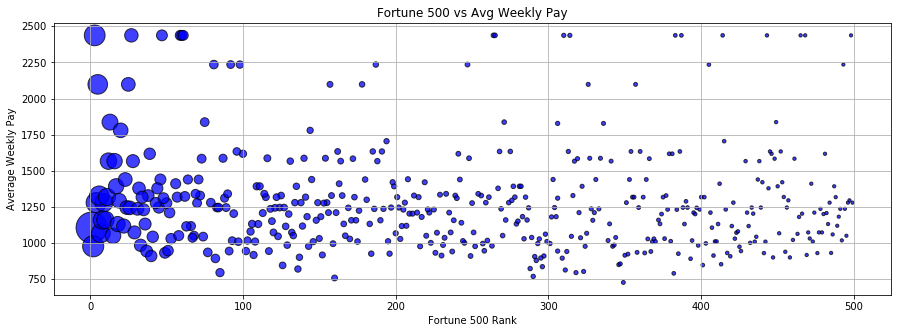

In [96]:

# Obtain the x and y coordinates for fortune 500 and wages
x_wages = wages_500["Rank"]
y_wages = wages_500["Annual Average Weekly Wage"].replace(',', '', inplace=True)
y_wages = wages_500["Annual Average Weekly Wage"].astype(int)




# Build the scatter plots 
plt.scatter(x_wages, y_wages, s= wages_500["Revenues"]*.002, label = "Wages", color=["blue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Fortune 500 Rank")
plt.ylabel("Average Weekly Pay")
plt.title("Fortune 500 vs Avg Weekly Pay")
plt.rcParams["figure.figsize"] = (15,5)


